In [1]:
%matplotlib inline
import util.price_geter as pg
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from IPython.display import display
from ipywidgets import interact # インタラクティブにトレーニング期間を修正したい
import mpl_finance as mpf
import matplotlib.dates as mdates
from matplotlib.dates import date2num


In [2]:
stock_num = 4592 # サンバイオ

flag, df = pg.naive_shite_or_not(stock_num) # データをロード

df.head()

#############
4592銘柄はこんな感じ
35.0 % の１日値上がりを記録 @ 2019-02-01 00:00:00
-21.1 % の１日値下がりを記録 @ 2019-04-16 00:00:00
仕手現象あり？


,open,high,low,close,volume,close_adjust,one_day_diff_ratio,train_set
date,,,,,,,,
2019-12-20,2553.0,2573.0,2475.0,2495.0,2528900.0,2495.0,0.000000,0
2019-12-19,2627.0,2718.0,2562.0,2578.0,4223900.0,2578.0,3.219550,0
2019-12-18,2445.0,2676.0,2432.0,2629.0,10547000.0,2629.0,1.939901,0
2019-12-16,3445.0,3445.0,3445.0,3445.0,121500.0,3445.0,23.686502,0
2019-12-13,4220.0,4245.0,4145.0,4145.0,393600.0,4145.0,16.887817,0


interactive(children=(IntSlider(value=140, description='k', max=280), Output()), _dom_classes=('widget-interac…

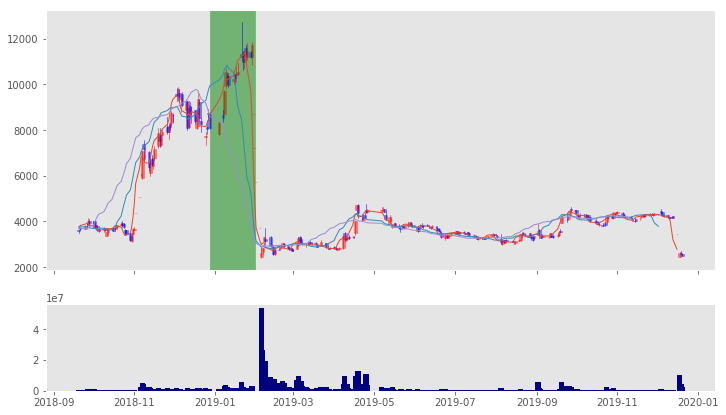

In [3]:
max_n = len(df)
train_span = 20
df.index = date2num(df.index)
@interact(k=(0 , max_n-train_span))
def stock_plot(k):
  data = df.reset_index().values
  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7), sharex=True,
                           gridspec_kw={'height_ratios': [3, 1]})
  mpf.candlestick_ohlc(axes[0], data, width=2, alpha=0.5, colorup='r', colordown='b')
  axes[0].plot(df.index, df['close'].rolling(4).mean(),linewidth = 1.0)
  axes[0].plot(df.index, df['close'].rolling(13).mean(),linewidth = 1.0)
  axes[0].plot(df.index, df['close'].rolling(26).mean(),linewidth = 1.0)
  axes[1].bar(df.index, df['volume'], width=4, color='navy')

  axes[0].grid()
  axes[1].grid()
  locator = mdates.AutoDateLocator()
  axes[0].xaxis.set_major_locator(locator)
  axes[0].xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
  
  if df.train_set.max() > 0:
    start_index = df.query("train_set > 0").tail(1).index[0]
    end_index = df.query("train_set > 0").head(1).index[0]
    axes[0].axvspan(start_index, end_index, alpha=0.5, color='green')
  #ここを調整したい
  k = int(k)
  axes[0].axvspan(df.index[k], df.index[k + train_span], alpha=0.5, color='red')


